In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
from scipy.spatial import distance_matrix

sys.path.append(os.path.abspath("./FISHnet/"))

from FISHnet_main import FISHnet_main

In [2]:
#Welcome to the FISHnet's Tutorial!!!

#In this Tutorial we are going to do the following:

#1) Load Sequential Oligopaints data from the Bintu 2018 Paper.

#2) Convert the raw data from the Bintu 2018 Paper into Pairwise Distance Matrices.

#3) Visualize the Pairwise Distance Matrices.

#4) Run FISHnet on a Pairwise Distance Matrix.

#5) Visualize FISHnet's output on the Pairwise Distance Matrix.

In [3]:
# Step 1) Load Sequential Oligopaints data from the Bintu 2018 Paper.
# First lets load in Bintu 2018 HCT116 Chr21:34.6-37.1 Mb Data:
# Raw data can be found here: https://github.com/BogdanBintu/ChromatinImaging

Data = np.loadtxt('HCT116_chr21_X.txt',delimiter = ',')
colnames = ['Chromosome index','Segment index','Z','X','Y']


Data_df = pd.DataFrame(Data,columns = colnames)
Data_df

,Chromosome index,Segment index,Z,X,Y
0,1.0,1.0,8089.0,97163.0,2889.0
1,1.0,2.0,8108.0,97239.0,3191.0
2,1.0,3.0,8053.0,97449.0,2855.0
3,1.0,4.0,7979.0,97345.0,2831.0
4,1.0,5.0,8013.0,97362.0,2907.0
...,...,...,...,...,...
965368,11631.0,79.0,6182.0,128248.0,86095.0
965369,11631.0,80.0,6034.0,128339.0,86109.0
965370,11631.0,81.0,6122.0,128335.0,86059.0
965371,11631.0,82.0,NaN,NaN,NaN


In [4]:
# Step 2) Convert the raw data from the Bintu 2018 Paper into Pairwise Distance Matrices.

# Lets convert the data into Pairwise distance Matrices

# Make HCT116 Dataset

# For this Tutuorial we only use Pairwise distance matrices with full walks.
full_walks = np.where((Data_df.groupby('Chromosome index').count()['Z'] >= 83) == True)[0] 
N = len(full_walks)
print(N)
walks = 83

Combined_untreat = np.zeros((N,walks,walks))
counter = 0

for num in full_walks:
    print(counter)
    
    Keys = Data_df[Data_df['Chromosome index'] == num+1]
    
    
    coords = Keys[['X','Y','Z']].copy()
    

    Map = distance_matrix(coords,coords)
    
    Combined_untreat[counter] = Map
    
    counter+=1
    

595
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

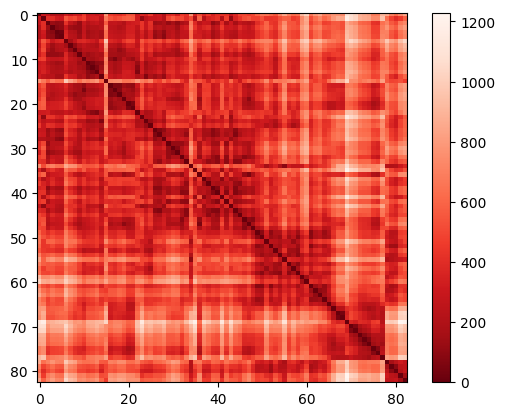

In [5]:
# Step 3) Visualize the Pairwise Distance Matrices.
# Lets visualize a Pairwise Distance Matrix:

Allele = 0 # Change this number to visualize a different Pairwise Distance Matrix! There are 594 maps you can choose from!

Pairwise_distance = Combined_untreat[Allele].copy()

plt.imshow(Pairwise_distance,cmap = 'Reds_r')
plt.colorbar()
plt.show()

In [6]:
# Step 4) Run FISHnet on a Pairwise Distance Matrix.

# Now lets Run FISHnet on this Pairwise Distance Matrix

# input_matrix defines the pairwise distance matrix to run FISHnet on.

# distance parameter tells FISHnet what distances to threshold on.

# size_exclusion removes boundaries that are less than or equal to N bins from eachother.

# merge averages boundaries that are less than or equal to N bins from eachother.

#plateau_size indicates the number of consecutive distance dependent thresholds for a call to be stable.


Domains,Distance_scale  = FISHnet_main(input_matrix=Pairwise_distance,
                          distance= [100,150,200,250,300,350,400,450,500,550,600,650],
                          plateau_size=4,
                          window_size=2,
                          size_exclusion=3,
                          merge=3)


In [7]:
Domains

# Note the output of FISHnet is a dictionary of domains and a dictionary of distance scales. 
# The keys in Domains indicate the number of plateau found.
# The values in Domains indicate the domains per each platue.

{0: [(0, 4.0),
  (4.0, 26.0),
  (26.0, 48.5),
  (48.5, 65.5),
  (65.5, 78.5),
  (78.5, 83)],
 1: [(0, 48.5), (48.5, 65.5), (65.5, 78.5), (78.5, 83)]}

In [8]:
Distance_scale

# The keys in Distance_scale indicate the number of plateau found.
# The values in Distance_scale indicate the distances that were grouped together.

{0: [200, 250, 300, 350], 1: [400, 450, 500, 550, 600, 650]}

In [9]:
# Step 5 Visualize FISHnet's output on the Pairwise Distance Matrix.

# Lets import a function to let us plot the boundaries as Domains:

def Domain_plotter(final_global_dic,Map_smooved,cmap = 'Reds_r',vmax=500,vmin=0):
    
    for j in final_global_dic.keys():
        
        for i in final_global_dic[j]:
            
            first = i[0]
            second = i[1]
            plt.plot([first,second], [first,first], color="cyan", linewidth=5)
            plt.plot([second,second], [first,second], color="cyan", linewidth=5)
            
    plt.imshow(Map_smooved,cmap = cmap,vmax = vmax,vmin = vmin)

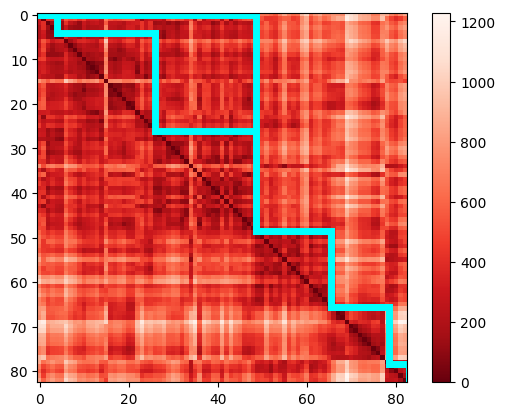

In [10]:
Domain_plotter(Domains,Pairwise_distance,vmax=np.max(Pairwise_distance))
plt.colorbar()
plt.show()